In [1]:
import tensorflow as tf

from model_v1 import ModelV1
from data_loader import load_evaluation_data, TrainingDataLoader
from constants import assignments, x, y

In [2]:
assignments['log_learning_rate'] = -1.

In [3]:
sess = tf.InteractiveSession()

In [4]:
training_loader = TrainingDataLoader(
  'localhost:5000',
  batch_size=25,
  image_size=516,
)

In [7]:
model = ModelV1()
sess.run(tf.global_variables_initializer())

In [8]:
for _ in range(10000):
    batch = training_loader.load_batch()
    print(model.train_batch(sess, batch))

0.043086372
0.0085352445
0.0041587045
0.009794484
0.0026648038
0.006665014
0.0059632836
0.00842242
0.011951655
0.007193979
0.0037569858
0.006651944
0.005998738
0.004482303
0.0113315005
0.005078421
0.0041672676
0.003933658
0.008412655
0.0055053784
0.0029521964


KeyboardInterrupt: 

In [9]:
evaluation_data = load_evaluation_data(
  'localhost:5000'
)

In [ ]:
def evaluate_model():
    count = 25
    x_eval, y_eval = evaluation_data
    n = 0
    total = 0.
    for i in range(0, len(x_eval), count):
        end = min(i + count, len(x_eval))
        spliced = x_eval[i:end], y_eval[i:end]
        total += model.evaluate(sess, spliced)
        n += 1
        print('average loss', total / n)
    return total / n

In [ ]:
evaluate_model()

In [5]:
import matplotlib.pyplot as plt

In [10]:
x_eval, y_eval = evaluation_data
shape = x_eval.shape[1:3]

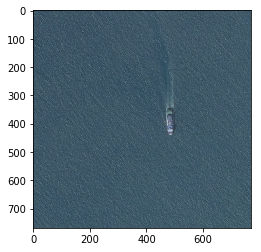

In [7]:
plt.imshow(x_eval[0])

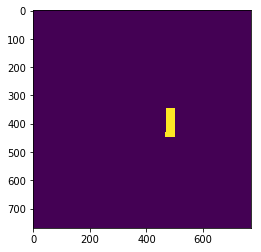

In [8]:
plt.imshow(y_eval[0].reshape(shape))

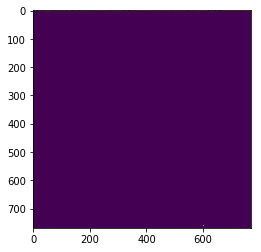

In [14]:
plt.imshow(model.forward(sess, x_data[:1])[0].reshape((shape)))